
**Topics**
- Name Entity Recognition
- Part of Speech Tagging
- Word Segmentation
- Sentence Segmentation

## Name Entity Recongition (for English)

In [ ]:
! pip install -q simpletransformers

     |████████████████████████████████| 248 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 1.2 MB 62.6 MB/s 
     |████████████████████████████████| 9.7 MB 24.8 MB/s 
     |████████████████████████████████| 311 kB 61.4 MB/s 
     |████████████████████████████████| 1.7 MB 63.7 MB/s 
     |████████████████████████████████| 6.8 MB 45.6 MB/s 
     |████████████████████████████████| 3.5 MB 61.4 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 596 kB 60.1 MB/s 
     |████████████████████████████████| 895 kB 61.2 MB/s 
     |████████████████████████████████| 180 kB 60.2 MB/s 
     |████████████████████████████████| 144 kB 65.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.0 MB/s 
     |████████████████████████████████| 243 kB 66.5 MB/s 
     |████████████████████████████████| 133 kB 65.3 MB/s 
     |███████████████

In [ ]:
import logging

import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_data = [
    [0, "Harry", "B-PER"],
    [0, "Potter", "I-PER"],
    [0, "was", "O"],
    [0, "a", "O"],
    [0, "student", "B-MISC"],
    [0, "at", "O"],
    [0, "Hogwarts", "B-LOC"],
    [1, "Albus", "B-PER"],
    [1, "Dumbledore", "I-PER"],
    [1, "founded", "O"],
    [1, "the", "O"],
    [1, "Order", "B-ORG"],
    [1, "of", "I-ORG"],
    [1, "the", "I-ORG"],
    [1, "Phoenix", "I-ORG"],
]
train_data = pd.DataFrame(
    train_data, columns=["sentence_id", "words", "labels"]
)

eval_data = [
    [0, "Sirius", "B-PER"],
    [0, "Black", "I-PER"],
    [0, "was", "O"],
    [0, "a", "O"],
    [0, "prisoner", "B-MISC"],
    [0, "at", "O"],
    [0, "Azkaban", "B-LOC"],
    [1, "Lord", "B-PER"],
    [1, "Voldemort", "I-PER"],
    [1, "founded", "O"],
    [1, "the", "O"],
    [1, "Death", "B-ORG"],
    [1, "Eaters", "I-ORG"],
]
eval_data = pd.DataFrame(
    eval_data, columns=["sentence_id", "words", "labels"]
)

In [ ]:
train_data

,sentence_id,words,labels
0,0,Harry,B-PER
1,0,Potter,I-PER
2,0,was,O
3,0,a,O
4,0,student,B-MISC
5,0,at,O
6,0,Hogwarts,B-LOC
7,1,Albus,B-PER
8,1,Dumbledore,I-PER
9,1,founded,O


In [ ]:
eval_data

,sentence_id,words,labels
0,0,Sirius,B-PER
1,0,Black,I-PER
2,0,was,O
3,0,a,O
4,0,prisoner,B-MISC
5,0,at,O
6,0,Azkaban,B-LOC
7,1,Lord,B-PER
8,1,Voldemort,I-PER
9,1,founded,O


In [ ]:
# Configure the model
model_args = NERArgs()
model_args.train_batch_size = 16
model_args.evaluate_during_training = True

model = NERModel(
    "roberta", "roberta-base", args=model_args,  use_cuda=torch.cuda.is_available())

# Train the model
model.train_model(train_data, eval_data=eval_data)

# Evaluate the model
result, model_outputs, preds_list = model.eval_model(eval_data)

# Make predictions with the model
predictions, raw_outputs = model.predict(["Hermione was the best in her class"])


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model:{'eval_loss': 2.157827615737915, 'precision': 0.3333333333333333, 'recall': 0.2, 'f1_score': 0.25}
INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
predictions

[[{'Hermione': 'O'},
  {'was': 'O'},
  {'the': 'O'},
  {'best': 'O'},
  {'in': 'O'},
  {'her': 'O'},
  {'class': 'O'}]]

In [ ]:
raw_outputs

[[{'Hermione': [[0.54,
     0.3257,
     0.1617,
     -0.4612,
     0.007668,
     -0.08093,
     0.3557,
     -0.04044,
     -0.1504],
    [0.546,
     0.3367,
     0.1302,
     -0.3127,
     0.02226,
     0.0543,
     0.3843,
     -0.013855,
     -0.0687]]},
  {'was': [[0.6123,
     0.3438,
     0.0795,
     -0.589,
     -0.03062,
     -0.01753,
     0.4158,
     -0.00879,
     -0.1711]]},
  {'the': [[0.61,
     0.3499,
     0.0987,
     -0.7188,
     -0.0681,
     -0.0654,
     0.3657,
     0.12225,
     -0.2158]]},
  {'best': [[0.8193,
     0.3804,
     0.2224,
     -0.6616,
     0.1924,
     0.1311,
     0.3408,
     0.1016,
     -0.05746]]},
  {'in': [[0.5854,
     0.3545,
     0.0776,
     -0.478,
     -0.08405,
     -0.0798,
     0.2443,
     0.0548,
     -0.1077]]},
  {'her': [[0.543,
     0.3706,
     0.1213,
     -0.4512,
     -0.01921,
     -0.01651,
     0.387,
     0.03748,
     -0.02711]]},
  {'class': [[0.7935,
     0.491,
     0.2,
     -0.5166,
     0.0627,
     0.071

## Name Entity Recognition (for Thai)

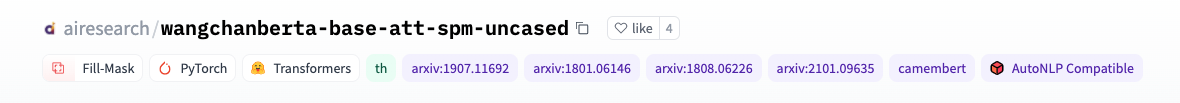

In [ ]:
! pip install -q datasets transformers[sentencepiece] simpletransformers

     |████████████████████████████████| 311 kB 8.1 MB/s 
     |████████████████████████████████| 248 kB 67.3 MB/s 
     |████████████████████████████████| 1.1 MB 65.5 MB/s 
     |████████████████████████████████| 133 kB 54.1 MB/s 
     |████████████████████████████████| 243 kB 72.9 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 1.7 MB 48.1 MB/s 
     |████████████████████████████████| 9.7 MB 30.1 MB/s 
     |████████████████████████████████| 180 kB 71.9 MB/s 
     |████████████████████████████████| 144 kB 70.3 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 144 kB 74.6 MB/s 
     |████████████████████████████████| 271 kB 51.3 MB/s 
     |████████████████████████████████| 111 kB 75.6 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 164 kB 76.7 MB/s 
     |█████████████████

In [ ]:
! wget https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz

--2022-02-14 11:30:07--  https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz [following]
--2022-02-14 11:30:07--  https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13551362 (13M) [application/octet-stream]
Saving to: ‘AIFORTHAI-LST20Corpus.tar.gz’

AIFORTHAI-LST20Corp 100%[===================>]  12.92M  --.-KB/s    in 0.07s   

2022-02-14 11:30:07 (191 MB/s) - ‘AIFORTHAI-LST20Corpus.tar.gz’ 

In [ ]:
!ls

AIFORTHAI-LST20Corpus.tar.gz  sample_data


In [ ]:
! tar -xvzf AIFORTHAI-LST20Corpus.tar.gz

Streaming output truncated to the last 5000 lines.
LST20_Corpus/train/._T12371.txt
LST20_Corpus/train/T12371.txt
LST20_Corpus/train/._T11678.txt
LST20_Corpus/train/T11678.txt
LST20_Corpus/train/._T10566.txt
LST20_Corpus/train/T10566.txt
LST20_Corpus/train/._T00775.txt
LST20_Corpus/train/T00775.txt
LST20_Corpus/train/._T12417.txt
LST20_Corpus/train/T12417.txt
LST20_Corpus/train/._T12403.txt
LST20_Corpus/train/T12403.txt
LST20_Corpus/train/._T10214.txt
LST20_Corpus/train/T10214.txt
LST20_Corpus/train/._T01319.txt
LST20_Corpus/train/T01319.txt
LST20_Corpus/train/._T00761.txt
LST20_Corpus/train/T00761.txt
LST20_Corpus/train/._T01457.txt
LST20_Corpus/train/T01457.txt
LST20_Corpus/train/._T00991.txt
LST20_Corpus/train/T00991.txt
LST20_Corpus/train/._T11644.txt
LST20_Corpus/train/T11644.txt
LST20_Corpus/train/._T00749.txt
LST20_Corpus/train/T00749.txt
LST20_Corpus/train/._T13053.txt
LST20_Corpus/train/T13053.txt
LST20_Corpus/train/._T11122.txt
LST20_Corpus/train/T11122.txt
LST20_Corpus/train/

In [ ]:
! pwd

/content


In [ ]:
from datasets import load_dataset
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")

Using custom data configuration default-97621787f5b60e1b


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset lst20 downloaded and prepared to /root/.cache/huggingface/datasets/lst20/default-97621787f5b60e1b/0.0.0/e1b2a921fb011578ab43ddbbf789f3c500d62cb2df8ae4ed4b60bae8e4c0d3ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
lst20

DatasetDict({
    train: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 63310
    })
    validation: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5620
    })
    test: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5250
    })
})

In [ ]:
import pandas as pd
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [ ]:
train_df

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"
...,...,...,...,...,...,...
63305,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[0, 0, 2, 1, 3, 2, 3, 7, 1, 0, 12, 1, 3, 5, 1,...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63306,7,T13136.txt,"[เมื่อ, ถาม, ว่า, _, ใน, ทาง, การเมือง, _, หาก...","[4, 1, 3, 2, 4, 0, 0, 2, 3, 0, 3, 1, 0, 6, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63307,8,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, เรื่อง, กฎหมาย...","[0, 0, 2, 1, 3, 2, 0, 0, 5, 3, 1, 2, 7, 1, 1, ...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63308,9,T13136.txt,"[หาก, เป็น, การ, ขอ, ถวาย, ฎีกา, ตาม, โบราณ, ร...","[3, 1, 7, 1, 1, 0, 4, 0, 0, 2, 5, 1, 0, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, ..."


In [ ]:
# See tags from https://github.com/huggingface/datasets/blob/master/datasets/lst20/lst20.py
_POS_TAGS = ["NN", "VV", "PU", "CC", "PS", "AX", "AV", "FX", "NU", "AJ", "CL", "PR", "NG", "PA", "XX", "IJ"]
_NER_TAGS = [
        "O",
        "B_BRN",
        "B_DES",
        "B_DTM",
        "B_LOC",
        "B_MEA",
        "B_NUM",
        "B_ORG",
        "B_PER",
        "B_TRM",
        "B_TTL",
        "I_BRN",
        "I_DES",
        "I_DTM",
        "I_LOC",
        "I_MEA",
        "I_NUM",
        "I_ORG",
        "I_PER",
        "I_TRM",
        "I_TTL",
        "E_BRN",
        "E_DES",
        "E_DTM",
        "E_LOC",
        "E_MEA",
        "E_NUM",
        "E_ORG",
        "E_PER",
        "E_TRM",
        "E_TTL",
    ]
_CLAUSE_TAGS = ["O", "B_CLS", "I_CLS", "E_CLS"]

In [ ]:
train_df["tokens"][0]

['สุรยุทธ์',
 'ยัน',
 'ปฏิเสธ',
 'ลงนาม',
 '_',
 'MOU',
 '_',
 'กับ',
 'อียู',
 'ไม่',
 'กระทบ',
 'สัมพันธ์']

In [ ]:
train_df["ner_tags"][0]

[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]

In [ ]:
list(map(lambda x: _NER_TAGS[x], train_df["ner_tags"][0]))

['B_PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_ORG', 'O', 'O', 'O']

In [ ]:
def convert_to_simple_transformer_format(df, field_name, tags):
  sentence_id = []
  words = []
  labels = []

  #Limit at 1000 rows for speed.
  for (idx, r) in df[:1000].iterrows():
    # print(idx)
    for (i, t) in enumerate(r['tokens']):
      # print(i,t)
      sentence_id.append(idx)
      words.append(t)
      labels.append(tags[r[field_name][i]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )


In [ ]:
train_ = convert_to_simple_transformer_format(train_df, "ner_tags", _NER_TAGS)

In [ ]:
train_

,sentence_id,words,labels
0,0,สุรยุทธ์,B_PER
1,0,ยัน,O
2,0,ปฏิเสธ,O
3,0,ลงนาม,O
4,0,_,O
...,...,...,...
30217,999,ไทยรักไทย,E_ORG
30218,999,อยู่,O
30219,999,ได้,O
30220,999,ไม่,O


In [ ]:
validation_ = convert_to_simple_transformer_format(validation_df, "ner_tags", _NER_TAGS)

In [ ]:
test_ = convert_to_simple_transformer_format(test_df, "ner_tags", _NER_TAGS)

In [ ]:
import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 32
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 10

model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

# Train the model
model.train_model(train_, eval_data=validation_)

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_NUM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171:

Running Epoch 1 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(["ประยุกธ์ เผย ลูกน้อง ไม่ เชื่อ พูด ตลก ได้ สามารถ แข่ง กับ โน๊ต อุดม เดี่ยว ไมโครโฟน เมื่อ วันที่ 26 กุมภาพันธ์ ที่ ตลาด หลักทรัพย์ แห่ง ประเทศไทย"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'ประยุกธ์': 'B_PER'},
  {'เผย': 'O'},
  {'ลูกน้อง': 'O'},
  {'ไม่': 'O'},
  {'เชื่อ': 'O'},
  {'พูด': 'O'},
  {'ตลก': 'O'},
  {'ได้': 'O'},
  {'สามารถ': 'O'},
  {'แข่ง': 'O'},
  {'กับ': 'O'},
  {'โน๊ต': 'B_PER'},
  {'อุดม': 'B_PER'},
  {'เดี่ยว': 'O'},
  {'ไมโครโฟน': 'O'},
  {'เมื่อ': 'O'},
  {'วันที่': 'B_DTM'},
  {'26': 'I_DTM'},
  {'กุมภาพันธ์': 'I_DTM'},
  {'ที่': 'O'},
  {'ตลาด': 'B_ORG'},
  {'หลักทรัพย์': 'I_ORG'},
  {'แห่ง': 'I_ORG'},
  {'ประเทศไทย': 'E_ORG'}]]

In [ ]:
# Evaluate the model
result, model_outputs, preds_list = model.eval_model(test_)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: E_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_DTM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171:

In [ ]:
# Saving and loading model
# Normally when the training is completed, it will automatically save the results into outputs/ folder

# Move outputs/ to ner/ for backup
! mv -f outputs/ ner/

# To load the model, you need to specify the model path "ner/" and also the model_args
test_ner = NERModel("camembert", 'ner/', args=model_args)

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:379: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


In [ ]:
# Make predictions with the loaded model
predictions, raw_outputs = test_ner.predict(["ประยุกธ์ เผย ลูกน้อง ไม่ เชื่อ พูด ตลก ได้ สามารถ แข่ง กับ โน๊ต อุดม เดี่ยว ไมโครโฟน เมื่อ วันที่ 26 กุมภาพันธ์ ที่ ตลาด หลักทรัพย์ แห่ง ประเทศไทย"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'ประยุกธ์': 'B_PER'},
  {'เผย': 'O'},
  {'ลูกน้อง': 'O'},
  {'ไม่': 'O'},
  {'เชื่อ': 'O'},
  {'พูด': 'O'},
  {'ตลก': 'O'},
  {'ได้': 'O'},
  {'สามารถ': 'O'},
  {'แข่ง': 'O'},
  {'กับ': 'O'},
  {'โน๊ต': 'B_PER'},
  {'อุดม': 'B_PER'},
  {'เดี่ยว': 'O'},
  {'ไมโครโฟน': 'O'},
  {'เมื่อ': 'O'},
  {'วันที่': 'B_DTM'},
  {'26': 'I_DTM'},
  {'กุมภาพันธ์': 'I_DTM'},
  {'ที่': 'O'},
  {'ตลาด': 'B_ORG'},
  {'หลักทรัพย์': 'I_ORG'},
  {'แห่ง': 'I_ORG'},
  {'ประเทศไทย': 'E_ORG'}]]

## Part of Speech Tagging (in Thai)

In [ ]:
train_ = convert_to_simple_transformer_format(train_df, "pos_tags", _POS_TAGS)

NameError: ignored

In [ ]:
train_

,sentence_id,words,labels
0,0,สุรยุทธ์,NN
1,0,ยัน,VV
2,0,ปฏิเสธ,VV
3,0,ลงนาม,VV
4,0,_,PU
...,...,...,...
30217,999,ไทยรักไทย,NN
30218,999,อยู่,AX
30219,999,ได้,AX
30220,999,ไม่,NG


In [ ]:
validation_ = convert_to_simple_transformer_format(validation_df, "pos_tags", _POS_TAGS)
test_ = convert_to_simple_transformer_format(test_df, "pos_tags", _POS_TAGS)

In [ ]:
# Configure the model
model_args = NERArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 10

model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=model_args, use_cuda=torch.cuda.is_available(), labels=_POS_TAGS
)

# Train the model
model.train_model(train_, eval_data=validation_)

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AX seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PU seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: N

Running Epoch 1 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Training of camembert model complete. Saved to outputs/.


(320,
 defaultdict(list,
             {'eval_loss': [0.8532069144248963,
               0.34123105454444885,
               0.26012678143382073,
               0.24057452172040938,
               0.23321715846657753,
               0.23839477249979973,
               0.23427834960818292,
               0.23833975990116596,
               0.2403291439265013,
               0.24248090076446532],
              'f1_score': [0.6535789791603746,
               0.8735554389942641,
               0.9156791859141727,
               0.9249503728293326,
               0.9322285390373618,
               0.9339470041856354,
               0.9372415632919834,
               0.9370393837329508,
               0.9369228204700784,
               0.9366404960744111],
              'global_step': [32, 64, 96, 128, 160, 192, 224, 256, 288, 320],
              'precision': [0.6999771672121166,
               0.887322975388423,
               0.9198359057130367,
               0.9260471641392211,
          

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(["ประยุกธ์ เผย ลูกน้อง ไม่ เชื่อ พูด ตลก ได้ สามารถ แข่ง กับ โน๊ต อุดม เดี่ยว ไมโครโฟน เมื่อ วันที่ 26 กุมภาพันธ์ ที่ ตลาด หลักทรัพย์ แห่ง ประเทศไทย"])
predictions

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'ประยุกธ์': 'NN'},
  {'เผย': 'VV'},
  {'ลูกน้อง': 'NN'},
  {'ไม่': 'NG'},
  {'เชื่อ': 'VV'},
  {'พูด': 'VV'},
  {'ตลก': 'NN'},
  {'ได้': 'AX'},
  {'สามารถ': 'AX'},
  {'แข่ง': 'VV'},
  {'กับ': 'PS'},
  {'โน๊ต': 'NN'},
  {'อุดม': 'NN'},
  {'เดี่ยว': 'VV'},
  {'ไมโครโฟน': 'NN'},
  {'เมื่อ': 'PS'},
  {'วันที่': 'NN'},
  {'26': 'NU'},
  {'กุมภาพันธ์': 'NN'},
  {'ที่': 'PS'},
  {'ตลาด': 'NN'},
  {'หลักทรัพย์': 'NN'},
  {'แห่ง': 'PS'},
  {'ประเทศไทย': 'NN'}]]

In [ ]:
# Evaluate the model
result, model_outputs, preds_list = model.eval_model(test_)

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PU seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PS seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: C

## Word segmentation (in Thai)

In [ ]:
! pip install -q datasets transformers[sentencepiece] simpletransformers

In [ ]:
from datasets import load_dataset
best2009 = load_dataset("best2009")

Downloading:   0%|          | 0.00/2.36k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.9M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset best2009 downloaded and prepared to /root/.cache/huggingface/datasets/best2009/best2009/1.0.0/f794327515ddde43166d2e256099e1f6a3d63f13b3197d8242bc80ef2cdb2dcb. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
best2009

DatasetDict({
    train: Dataset({
        features: ['fname', 'char', 'char_type', 'is_beginning'],
        num_rows: 148995
    })
    test: Dataset({
        features: ['fname', 'char', 'char_type', 'is_beginning'],
        num_rows: 2252
    })
})

In [ ]:
train_df = pd.DataFrame(best2009["train"])

In [ ]:
test_df = pd.DataFrame(best2009["test"])

In [ ]:
train_df[:10]

,fname,char,char_type,is_beginning
0,article_00001.txt,"[ก, ฎ, ห, ม, า, ย, ก, ั, บ, ก, า, ร, เ, บ, ี, ...","[1, 1, 3, 1, 10, 1, 1, 4, 1, 1, 10, 1, 11, 1, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, ..."
1,article_00001.txt,"[จ, า, ก, ต, ้, น, ฉ, บ, ั, บ, เ, ร, ื, ่, อ, ...","[1, 10, 1, 1, 9, 1, 3, 1, 4, 1, 11, 1, 10, 9, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,article_00001.txt,"[ไ, พ, ส, ิ, ฐ, , พ, า, ณ, ิ, ช, ย, ์, ก, ุ, ...","[11, 1, 1, 10, 1, 5, 1, 10, 1, 10, 1, 1, 7, 1,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,article_00001.txt,"[อ, า, จ, า, ร, ย, ์, ป, ร, ะ, จ, ำ, , ส, า, ...","[1, 10, 1, 10, 1, 1, 7, 1, 1, 10, 1, 10, 5, 1,...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, ..."
4,article_00001.txt,"[(, บ, ท, ค, ว, า, ม, น, ี, ้, ย, า, ว, ป, ร, ...","[4, 1, 1, 1, 1, 10, 1, 1, 10, 9, 1, 10, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ..."
5,article_00001.txt,"[ค, ว, า, ม, น, ำ, \n]","[1, 1, 10, 1, 1, 10, 4]","[1, 0, 0, 0, 1, 0, 1]"
6,article_00001.txt,"[ค, น, จ, น, ภ, า, ย, ใ, ต, ้, ค, ว, า, ม, ส, ...","[1, 1, 1, 1, 1, 10, 1, 11, 1, 9, 1, 1, 10, 1, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, ..."
7,article_00001.txt,"[เ, น, ื, ่, อ, ง, จ, า, ก, ท, ั, ้, ง, ป, ร, ...","[11, 1, 10, 9, 1, 1, 1, 10, 1, 1, 4, 9, 1, 1, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ..."
8,article_00001.txt,"[ส, ำ, ห, ร, ั, บ, เ, ร, ื, ่, อ, ง, ท, ี, ่, ...","[1, 10, 3, 1, 4, 1, 11, 1, 10, 9, 1, 1, 1, 10,...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
9,article_00001.txt,"[แ, ต, ่, ใ, น, ท, ั, ศ, น, ะ, ข, อ, ง, ผ, ู, ...","[11, 1, 9, 11, 1, 1, 4, 1, 1, 10, 1, 1, 1, 3, ...","[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."


In [ ]:
def convert_best2009_to_simple_transformer_format(df):
  sentence_id = []
  chars = []
  labels = []

  for (idx, r) in df.iterrows():
    # print(idx)
    for (i, t) in enumerate(r['char']):
      # print(i,t)
      sentence_id.append(idx)
      chars.append(t)
      labels.append("B_WORD" if r["is_beginning"][i]==1 else "I_WORD") #"O", and "E_WORD" is your homework :)

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": chars, "labels": labels}
  )


In [ ]:
#Limit at 1000 rows for speed.
train_ = convert_best2009_to_simple_transformer_format(train_df[:1000])
test_ = convert_best2009_to_simple_transformer_format(test_df[:100])

In [ ]:
train_

,sentence_id,words,labels
0,0,ก,B_WORD
1,0,ฎ,I_WORD
2,0,ห,I_WORD
3,0,ม,I_WORD
4,0,า,I_WORD
...,...,...,...
277051,999,i,I_WORD
277052,999,h,I_WORD
277053,999,a,I_WORD
277054,999,d,I_WORD


In [ ]:
test_

,sentence_id,words,labels
0,0,บ,B_WORD
1,0,ท,I_WORD
2,0,ท,I_WORD
3,0,ี,I_WORD
4,0,่,I_WORD
...,...,...,...
15115,99,ค,I_WORD
15116,99,่,I_WORD
15117,99,ะ,I_WORD
15118,99,"""",I_WORD


In [ ]:
# Configure the model
model_args = NERArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 10

model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=model_args, use_cuda=torch.cuda.is_available(), labels=["B_WORD","I_WORD"]
)

# Train the model
model.train_model(train_, eval_data=test_)

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_WORD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_WORD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


Running Epoch 1 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

INFO:simpletransformers.ner.ner_model: Training of camembert model complete. Saved to outputs/.


(320,
 defaultdict(list,
             {'eval_loss': [0.6609222934796259,
               0.7411051896902231,
               1.0149763318208547,
               1.2395803928375244,
               1.3514244831525362,
               1.4211426514845629,
               1.479082621060885,
               1.5065178412657518,
               1.580241927733788,
               1.5589977136025062],
              'f1_score': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              'global_step': [32, 64, 96, 128, 160, 192, 224, 256, 288, 320],
              'precision': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              'recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              'train_loss': [0.19619065523147583,
               0.12192857265472412,
               0.07146307080984116,
               0.08218855410814285,
               0.07937270402908325,
               0.04691838473081589,
               0.04579898715019226,
               0.05441558361053467,


In [ ]:
predictions, raw_outputs = model.predict("ประยุกธ์เผยลูกน้องไม่เชื่อพูดตลกได้")
predictions

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/35 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/5 [00:00<?, ?it/s]

[[{'ป': 'I_WORD'}],
 [{'ร': 'I_WORD'}],
 [{'ะ': 'B_WORD'}],
 [{'ย': 'I_WORD'}],
 [{'ุ': 'I_WORD'}],
 [{'ก': 'I_WORD'}],
 [{'ธ': 'B_WORD'}],
 [{'์': 'B_WORD'}],
 [{'เ': 'B_WORD'}],
 [{'ผ': 'B_WORD'}],
 [{'ย': 'I_WORD'}],
 [{'ล': 'I_WORD'}],
 [{'ู': 'I_WORD'}],
 [{'ก': 'I_WORD'}],
 [{'น': 'I_WORD'}],
 [{'้': 'I_WORD'}],
 [{'อ': 'I_WORD'}],
 [{'ง': 'I_WORD'}],
 [{'ไ': 'I_WORD'}],
 [{'ม': 'B_WORD'}],
 [{'่': 'I_WORD'}],
 [{'เ': 'B_WORD'}],
 [{'ช': 'I_WORD'}],
 [{'ื': 'B_WORD'}],
 [{'่': 'I_WORD'}],
 [{'อ': 'I_WORD'}],
 [{'พ': 'I_WORD'}],
 [{'ู': 'I_WORD'}],
 [{'ด': 'I_WORD'}],
 [{'ต': 'I_WORD'}],
 [{'ล': 'I_WORD'}],
 [{'ก': 'I_WORD'}],
 [{'ไ': 'I_WORD'}],
 [{'ด': 'I_WORD'}],
 [{'้': 'I_WORD'}]]

In [ ]:
# Evaluate the model
result, model_outputs, preds_list = model.eval_model(test_)

INFO:simpletransformers.ner.ner_model: Converting to features started.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_WORD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_WORD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
INFO:simpletransformers.ner.ner_model:{'eval_loss': 1.5589977136025062, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}


## Sentence Segmentation (in Thai)

In [ ]:
# Now it is your turn :)

## Deploy your model to Huggingface's transformers website (You must run the NER training before)

In [ ]:
! pip install transformers[sentencepiece]

     |████████████████████████████████| 3.5 MB 7.9 MB/s 
     |████████████████████████████████| 67 kB 7.1 MB/s 
     |████████████████████████████████| 6.8 MB 48.0 MB/s 
     |████████████████████████████████| 895 kB 69.7 MB/s 
     |████████████████████████████████| 596 kB 67.2 MB/s 
     |████████████████████████████████| 1.2 MB 65.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
! huggingface-cli login
# You need to get access token from: https://huggingface.co/settings/token
# But if you are lazy, you can press CTRL+C, and input your username and password of huggingface website.


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/token.
        (Deprecated, will be removed in v0.3.0) To login with username and password instead, interrupt with Ctrl+C.
        
Username: Traceback (most recent call last):
  File "/usr/lib/python3.7/getpass.py", line 77, in unix_getpass
^C


In [ ]:
# Install git-lfs, since it is dependency to push model into the hugging face
! curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
! apt-get install -y git-lfs

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-ad

In [ ]:
# Sharing to the transformer models website.
test_ner.model.push_to_hub("wangchanberta-ner")
test_ner.tokenizer.push_to_hub("wangchanberta-ner")

# Enter https://huggingface.co/{username}/wangchanberta-ner

Upload file sentencepiece.bpe.model:   4%|3         | 32.0k/883k [00:00<?, ?B/s]

To https://huggingface.co/kobkrit/wangchanberta-ner
   8d6973e..0436450  main -> main



'https://huggingface.co/kobkrit/wangchanberta-ner/commit/0436450b4c0116fcb1b4f0e556a02492c10d393b'

In [ ]:
# Loading from the transformer model website.
test_ner2 = NERModel("camembert", 'kobkrit/wangchanberta-ner', args=ner_args)

Downloading:   0%|          | 0.00/498 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/883k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/305 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:379: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


In [ ]:
# Make predictions with the loaded model
predictions, raw_outputs = test_ner2.predict(["ประยุกธ์ เผย ลูกน้อง ไม่ เชื่อ พูด ตลก ได้ สามารถ แข่ง กับ โน๊ต อุดม เดี่ยว ไมโครโฟน เมื่อ วันที่ 26 กุมภาพันธ์ ที่ ตลาด หลักทรัพย์ แห่ง ประเทศไทย"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'ประยุกธ์': 'B_PER'},
  {'เผย': 'O'},
  {'ลูกน้อง': 'O'},
  {'ไม่': 'O'},
  {'เชื่อ': 'O'},
  {'พูด': 'O'},
  {'ตลก': 'O'},
  {'ได้': 'O'},
  {'สามารถ': 'O'},
  {'แข่ง': 'O'},
  {'กับ': 'O'},
  {'โน๊ต': 'B_PER'},
  {'อุดม': 'B_PER'},
  {'เดี่ยว': 'O'},
  {'ไมโครโฟน': 'O'},
  {'เมื่อ': 'O'},
  {'วันที่': 'B_DTM'},
  {'26': 'I_DTM'},
  {'กุมภาพันธ์': 'I_DTM'},
  {'ที่': 'O'},
  {'ตลาด': 'B_ORG'},
  {'หลักทรัพย์': 'I_ORG'},
  {'แห่ง': 'I_ORG'},
  {'ประเทศไทย': 'E_ORG'}]]

If you want to add more detailed information, please see >> How to make model card. >>  https://huggingface.co/docs/hub/model-repos